# Perkenalan

nama : Stepanus Dody Kristianto Wicaksono
batch : 001

#### Dataset

Dataset merupakan data untuk dapat memprediksi kelangsungan hidup pasien akibat gagal jantung. Informatika Medis BMC dan Pengambilan Keputusan 20, 16 (2020)

#### Sumber Dataset

data asli berasal dari data kaggle dengan link: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

#### Objective

Membuat model klasifikasi untuk memprediksi kematian akibat Gagal Jantung.

#### Attribute Information

* Age = age
* anaemia = Decrease of red blood cells or hemoglobin (boolean)
* creatinine_phosphokinase = Level of the CPK enzyme in the blood (mcg/L)
* diabetes = If the patient has diabetes (boolean)
* ejection_fraction = Percentage of blood leaving the heart at each contraction (percentage)
* high_blood_pressure = If the patient has hypertension (boolean)
* platelets = Platelets in the blood (kiloplatelets/mL)
* serum_creatinine = Level of serum creatinine in the blood (mg/dL)
* serum_sodium = Level of serum sodium in the blood (mEq/L)
* sex = Woman or man (binary)
* smoking = If the patient smokes or not (boolean)
* time = Follow-up period (days)
* DEATH_EVENT = If the patient deceased during the follow-up period (boolean)

# Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

# Data loading

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

#### melihat data teratas

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### melihat data terbawah

In [4]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


#### melihat informasi mengenai data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


dari informasi terlihat bahwa data secara keseluruhan memiliki type numerical 

#### melihat columns data

In [6]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

#### melihat statistika data

In [7]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


#### melihat ukuran data

In [8]:
data.shape

(299, 13)

data memliki ukuran 299 rows dan 13 columns

#### melihat columns 'DEATH_EVENT'

In [9]:
data['DEATH_EVENT'].unique()

array([1, 0])

# Data Cleaning

#### melakukan pengecekan missing values

In [10]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

dari hasil pengecekan tidak terdapat data Missing Values

# Explorasi Data Analysis

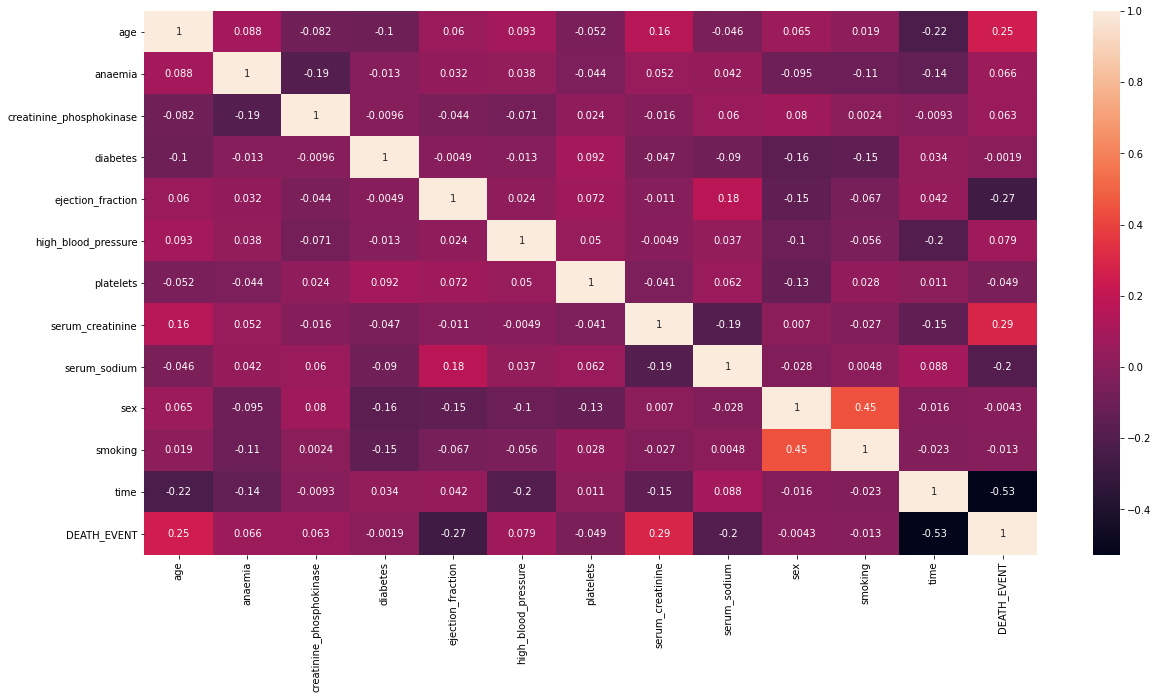

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True);

Dari hasil visualisasi terlihat bahwa jenis kelamin memiliki korelasi positif dengan perokok atau tidak

#### Visualisasi pasien gagal jantung

In [63]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

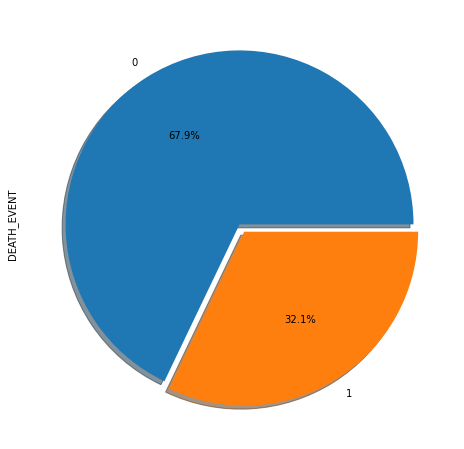

In [73]:
plt.figure(figsize=(8,8))
data['DEATH_EVENT'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', shadow=True);

Jumlah pasien yang meninggal akibat gagal jantung adalah 96 pasien (32%) dan yang meninggal bukan akibat gagal jantung adalah 203 pasien (68%)

#### Visualisasi antara usia pasien dengan resiko meninggal akibat gagal jantung

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


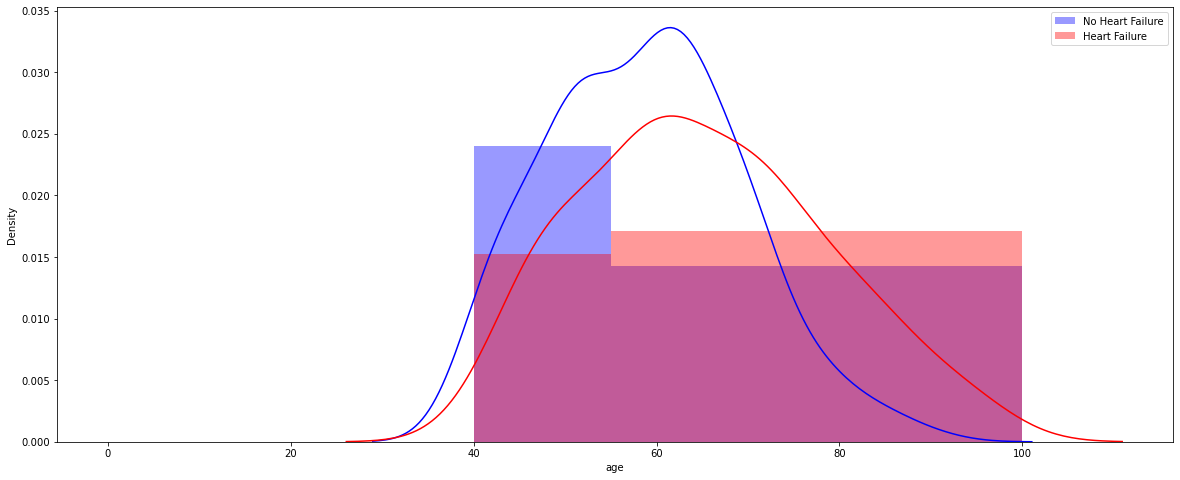

In [12]:
plt.figure(figsize=(20,8))
sns.distplot(data['age'][data['DEATH_EVENT'] == 0], bins=[0,5,12,18,40,55,100], color='b', label='No Heart Failure')
sns.distplot(data['age'][data['DEATH_EVENT'] == 1], bins=[0,5,12,18,40,55,100], color='r', label='Heart Failure')
plt.legend();

Dari Visualisasi terlihat bahwa pasien dengan usia 55 tahun keatas memiliki kemungkinan meninggal akibat gagal jantung, sedangkan untuk pasien dengan usia 40 sampai 55 tahun memiliki kemungkinan kecil meninggal akibat gagal jantung

#### Visualisasi antara pasien penderita 'anaemia' dengan resiko meninggal akibat gagal jantung

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


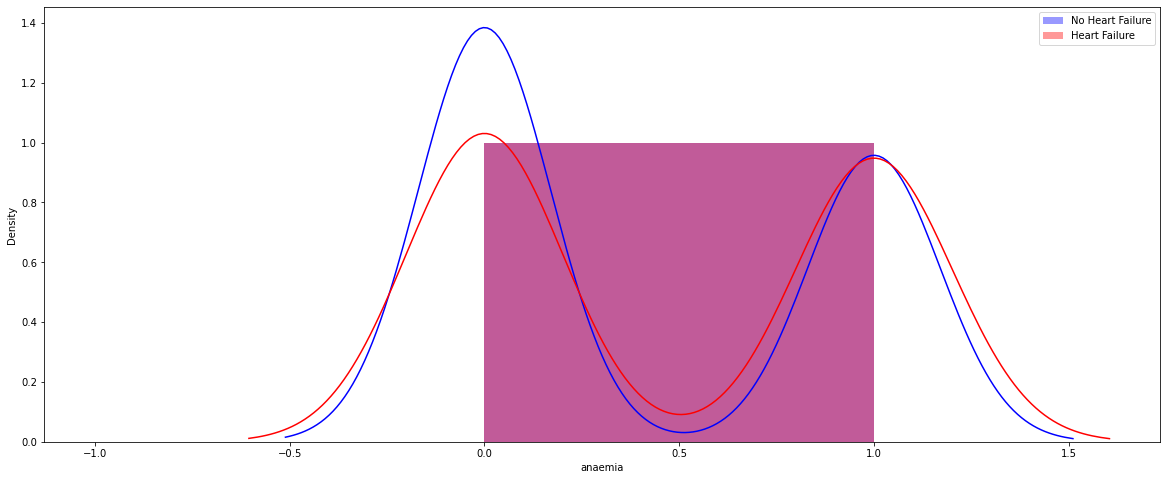

In [13]:
plt.figure(figsize=(20,8))
sns.distplot(data['anaemia'][data['DEATH_EVENT'] == 0], bins=[-1,0,1], color='b', label='No Heart Failure')
sns.distplot(data['anaemia'][data['DEATH_EVENT'] == 1], bins=[-1,0,1], color='r', label='Heart Failure')
plt.legend();

Dari Visualisasi terlihat bahwa pasien yang menderita anaemie tidak memiliki pengaruh signifikan terhadap kematian akibat gagal jantung

#### Visualisasi antara creatinine_phosphokinase pasien dengan resiko meninggal akibat gagal jantung

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


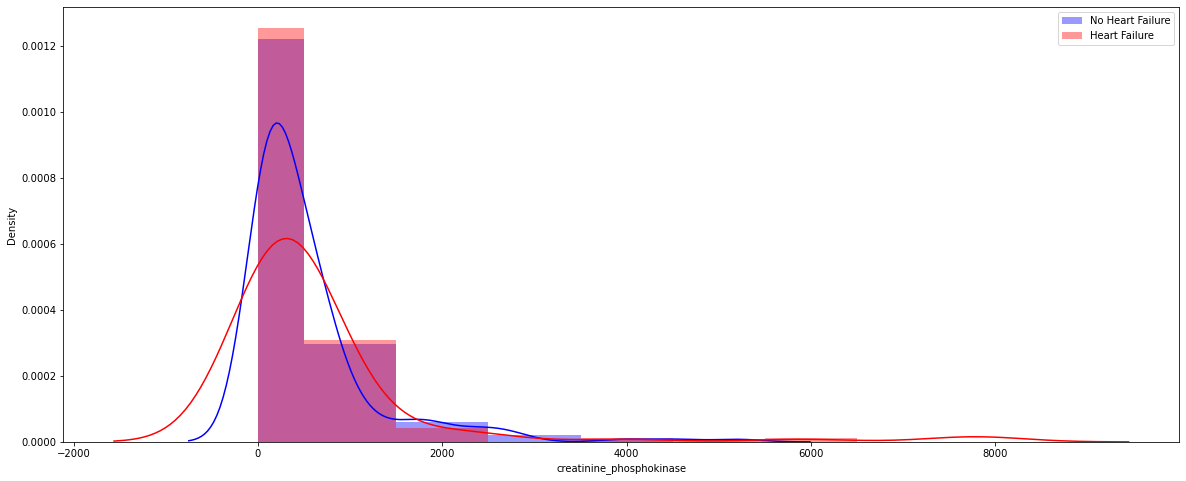

In [14]:
plt.figure(figsize=(20,8))
sns.distplot(data['creatinine_phosphokinase'][data['DEATH_EVENT'] == 0], bins=[0,500,1500,2500,3500,4500,5500,6500,7500], color='b', label='No Heart Failure')
sns.distplot(data['creatinine_phosphokinase'][data['DEATH_EVENT'] == 1], bins=[0,500,1500,2500,3500,4500,5500,6500,7500], color='r', label='Heart Failure')
plt.legend();

Dari Visualisasi terlihat bahwa pasien dengan tiingkat enzim CPK dalam darah sampai dengan 1500(mcg/L) memiliki kemungkinan resiko meninggal akibat gagal jantung

#### Visualisasi antara pasien penderita 'diabetes' dengan resiko meninggal akibat gagal jantung

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


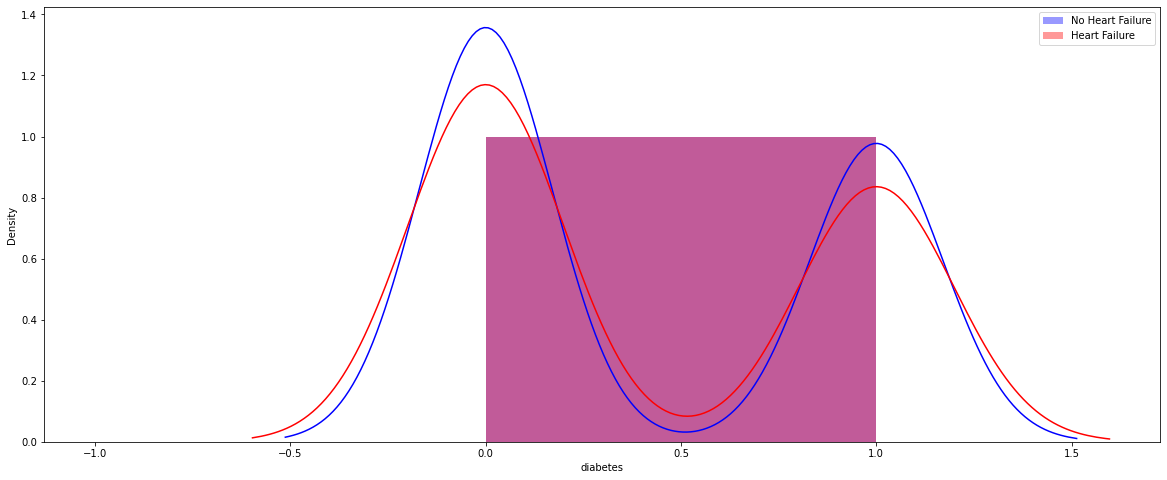

In [15]:
plt.figure(figsize=(20,8))
sns.distplot(data['diabetes'][data['DEATH_EVENT'] == 0], bins=[-1,0,1], color='b', label='No Heart Failure')
sns.distplot(data['diabetes'][data['DEATH_EVENT'] == 1], bins=[-1,0,1], color='r', label='Heart Failure')
plt.legend();

Dari Visualisasi terlihat bahwa pasien yang menderita Diabetes tidak memiliki pengaruh signifikan terhadap kematian akibat gagal jantung

#### Visualisasi antara ejection_fraction pasien dengan resiko meninggal akibat gagal jantung

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


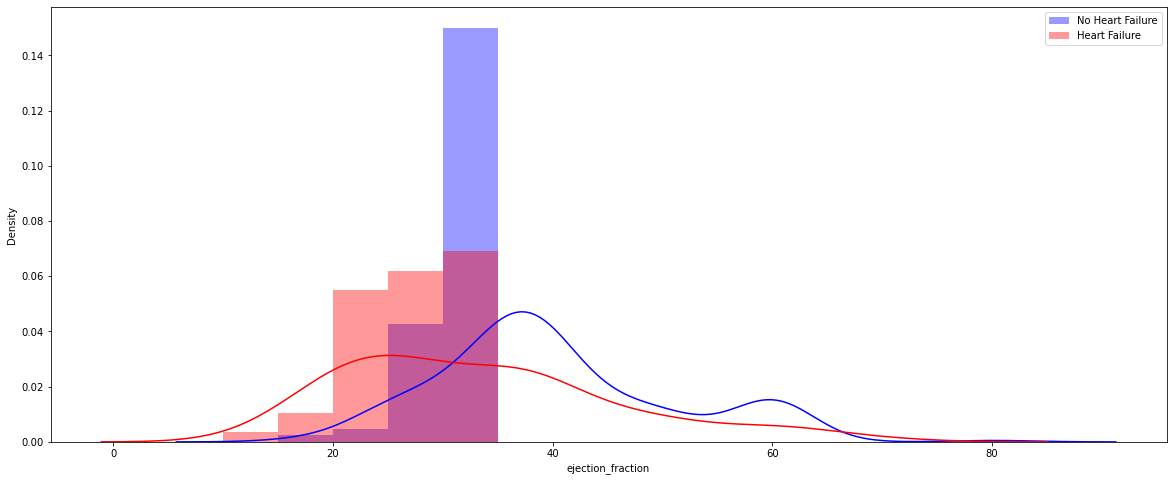

In [16]:
plt.figure(figsize=(20,8))
sns.distplot(data['ejection_fraction'][data['DEATH_EVENT'] == 0], bins=[0,5,10,15,20,25,30,35], color='b', label='No Heart Failure')
sns.distplot(data['ejection_fraction'][data['DEATH_EVENT'] == 1], bins=[0,5,10,15,20,25,30,35], color='r', label='Heart Failure')
plt.legend();

Dari Visualisasi terlihat bahwa pasien yang memiliki persentase darah yang meninggalkan jantung pada setiap kontraksi dengan range 15% sampai dengan 35% memiliki resiko meninggal akibat gagal jantung

#### Visualisasi antara pasien penderita 'high_blood_pressure' dengan resiko meninggal akibat gagal jantung

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


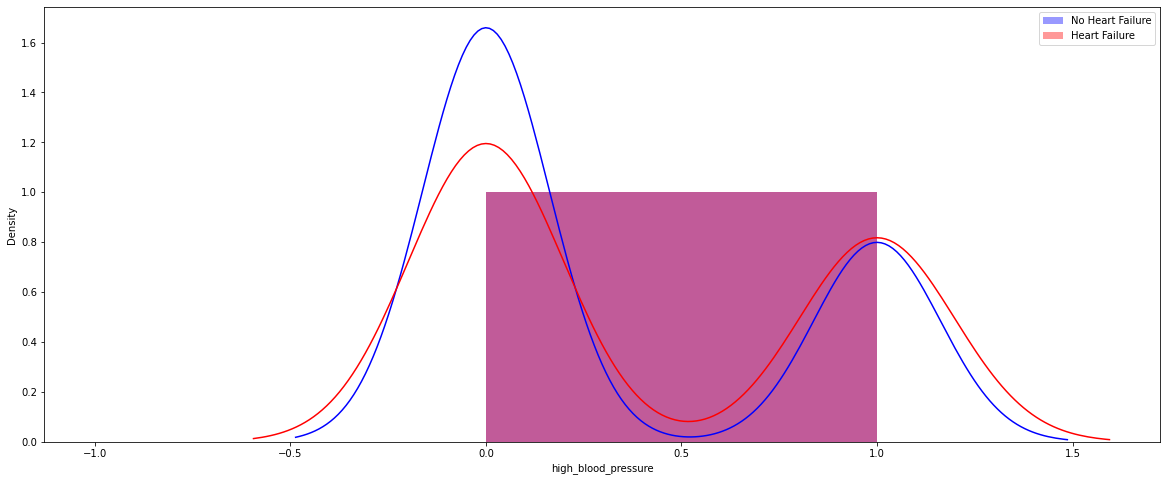

In [17]:
plt.figure(figsize=(20,8))
sns.distplot(data['high_blood_pressure'][data['DEATH_EVENT'] == 0], bins=[-1,0,1], color='b', label='No Heart Failure')
sns.distplot(data['high_blood_pressure'][data['DEATH_EVENT'] == 1], bins=[-1,0,1], color='r', label='Heart Failure')
plt.legend();

Dari Visualisasi terlihat bahwa pasien menderita hipertensi tidak memiliki pengaruh signifikan terhadap kematian akibat gagal jantung

#### Visualisasi antara 'platelets' pasien dengan resiko meninggal akibat gagal jantung

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


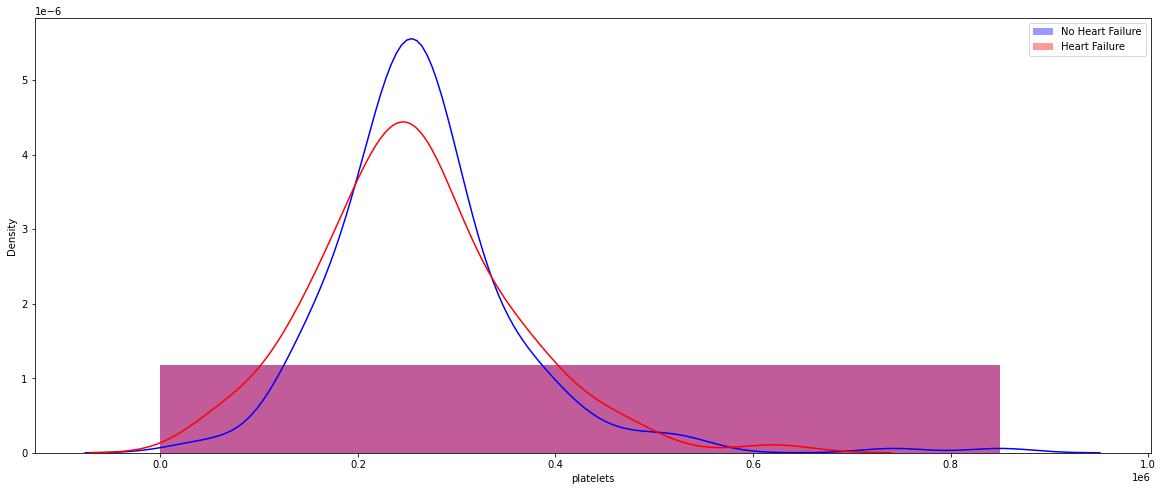

In [18]:
plt.figure(figsize=(20,8))
sns.distplot(data['platelets'][data['DEATH_EVENT'] == 0], bins=[0, 850000], color='b', label='No Heart Failure')
sns.distplot(data['platelets'][data['DEATH_EVENT'] == 1], bins=[0, 850000], color='r', label='Heart Failure')
plt.legend();

Dari Visualisasi terlihat bahwa jumlah trombosit dalam darah (kiloplatelet/mL) pasien tidak memiliki pengaruh signifikan terhadap kematian akibat gagal jantung

#### Visualisasi antara 'serum_creatinine' pasien dengan resiko meninggal akibat gagal jantung

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


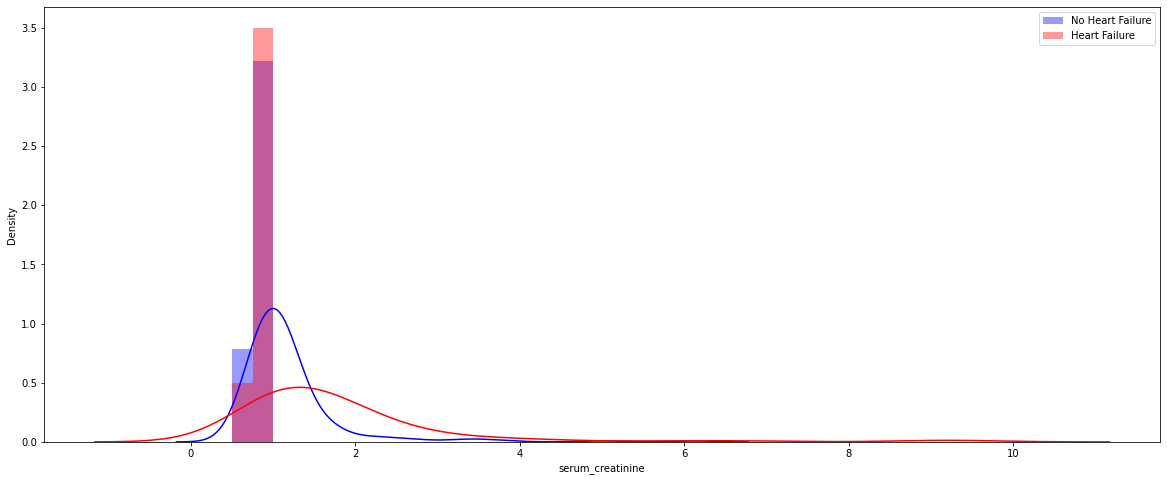

In [19]:
plt.figure(figsize=(20,8))
sns.distplot(data['serum_creatinine'][data['DEATH_EVENT'] == 0], bins=[0, 0.25, 0.5, 0.75, 1.0], color='b', label='No Heart Failure')
sns.distplot(data['serum_creatinine'][data['DEATH_EVENT'] == 1], bins=[0, 0.25, 0.5, 0.75, 1.0], color='r', label='Heart Failure')
plt.legend();

Dari hasil visualisasi terlihat bahwa pasien dengan kadar kreatinin serum dalam darah antara 0.75(mg/dL) sampai dengan 1.0(mg/dL) memiliki kemungkinan resiko meninggal akibat gagal jantung 

#### Visualisasi antara 'serum_sodium' pasien dengan resiko meninggal akibat gagal jantung

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


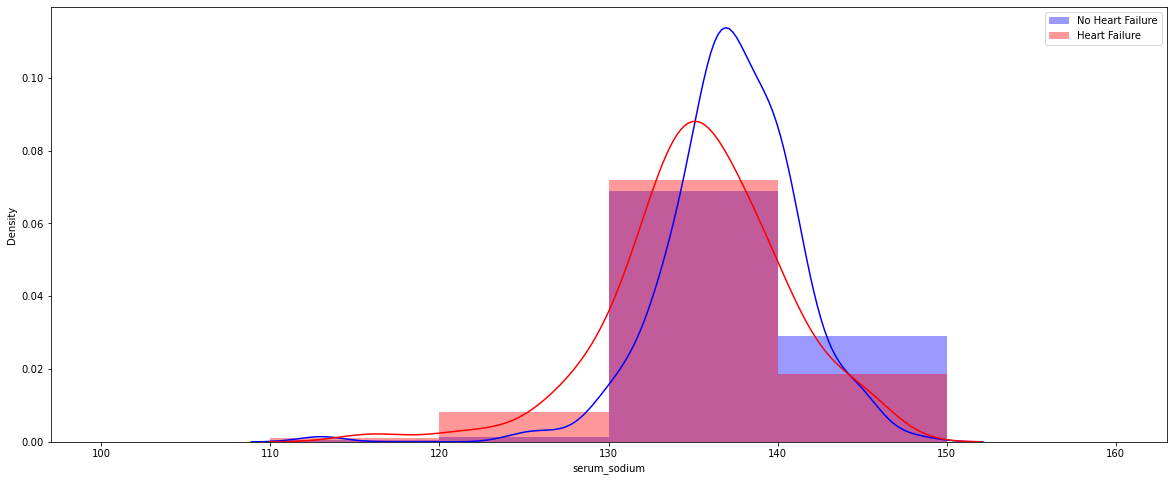

In [20]:
plt.figure(figsize=(20,8))
sns.distplot(data['serum_sodium'][data['DEATH_EVENT'] == 0], bins=[100,110,120,130,140,150,160], color='b', label='No Heart Failure')
sns.distplot(data['serum_sodium'][data['DEATH_EVENT'] == 1], bins=[100,110,120,130,140,150,160], color='r', label='Heart Failure')
plt.legend();

Dari visualisasi terlihat bahwa pasien dengan kadar serum sodium dalam darah antara 120 (mEq/L) sampai dengan 140 (mEq/L) memiliki kemungkinan meninggal akibat gagal jantung

#### Visualisasi antara jenis kelamin pasien dengan resiko meninggal akibat gagal jantung

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


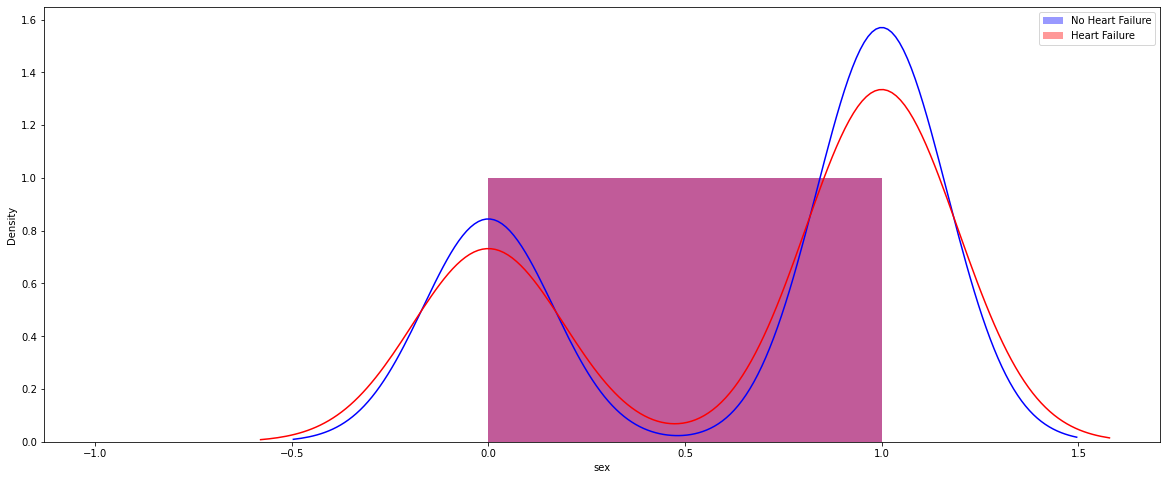

In [21]:
plt.figure(figsize=(20,8))
sns.distplot(data['sex'][data['DEATH_EVENT'] == 0], bins=[-1,0,1], color='b', label='No Heart Failure')
sns.distplot(data['sex'][data['DEATH_EVENT'] == 1], bins=[-1,0,1], color='r', label='Heart Failure')
plt.legend();

Dari Visualisasi terlihat bahwa jenis kelamin pasien tidak memiliki pengaruh signifikan terhadap kematian akibat gagal jantung

#### Visualisasi antara pasien perokok atau bukan dengan resiko meninggal akibat gagal jantung

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


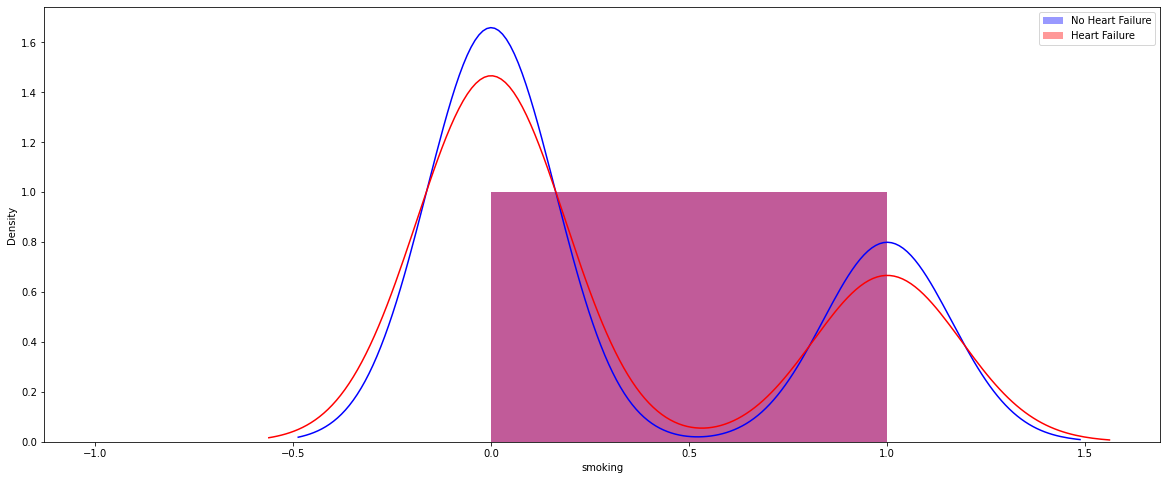

In [22]:
plt.figure(figsize=(20,8))
sns.distplot(data['smoking'][data['DEATH_EVENT'] == 0], bins=[-1,0,1], color='b', label='No Heart Failure')
sns.distplot(data['smoking'][data['DEATH_EVENT'] == 1], bins=[-1,0,1], color='r', label='Heart Failure')
plt.legend();

Dari Visualisasi terlihat bahwa pasien dengan kebiasaan merokok dan tidak memiliki kebiasaan merokok tidak memiliki pengaruh signifikan terhadap kematian akibat gagal jantung

#### Visualisasi antara Follow-up period(days) pasien dengan resiko meninggal akibat gagal jantung

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


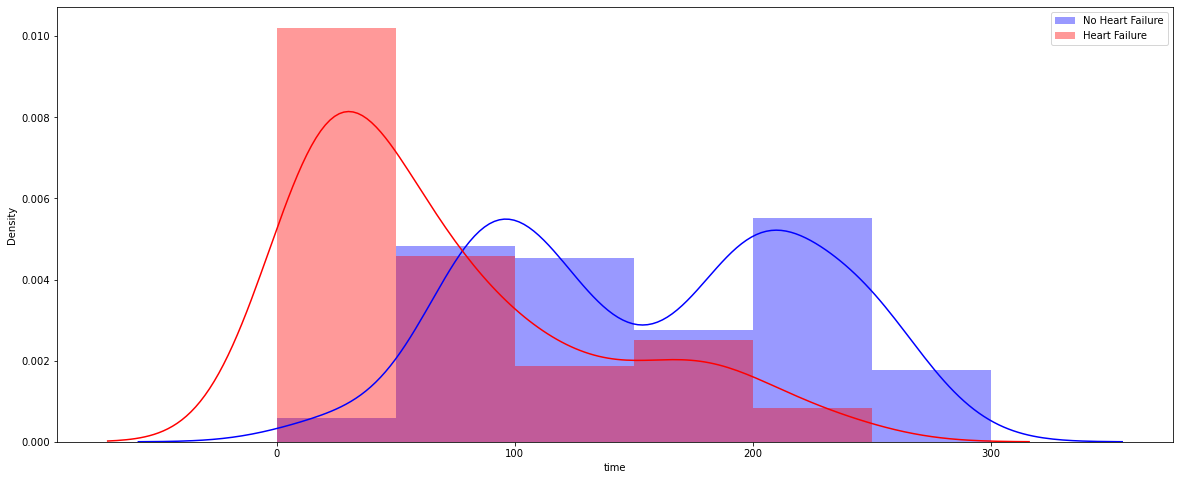

In [23]:
plt.figure(figsize=(20,8))
sns.distplot(data['time'][data['DEATH_EVENT'] == 0], bins=[0,50,100,150,200,250,300], color='b', label='No Heart Failure')
sns.distplot(data['time'][data['DEATH_EVENT'] == 1], bins=[0,50,100,150,200,250,300], color='r', label='Heart Failure')
plt.legend();

Dari visualisasi terlihat bahwa pasien dengan periode tindak lanjut antara 1 sampai dengan 50 (hari) memiliki kemungkinan meninggal akibat gagal jantung 

## Analysis Explorasi Data Analysis

Dari hasil visualisasi didapatkan informasi sebagai berikut:

* Jumlah pasien yang meninggal akibat gagal jantung adalah 96 pasien dan yang meninggal bukan akibat gagal jantung adalah 203 pasien
* Pasien dengan usia 55 tahun keatas memiliki kemungkinan meninggal akibat gagal jantung, sedangkan untuk pasien dengan usia 40 sampai 55 tahun memiliki kemungkinan kecil meninggal akibat gagal jantung
* Pasien yang menderita anaemie tidak memiliki pengaruh signifikan terhadap kematian akibat gagal jantung
* Pasien dengan tingkat enzim CPK dalam darah sampai dengan 1500 (mcg/L) memiliki kemungkinan resiko meninggal akibat gagal jantung
* Pasien yang menderita Diabetes tidak memiliki pengaruh signifikan terhadap kematian akibat gagal jantung
* Pasien yang memiliki persentase darah yang meninggalkan jantung pada setiap kontraksi dengan range 15% sampai dengan 35% memiliki resiko meninggal akibat gagal jantung
* Pasien menderita hipertensi tidak memiliki pengaruh signifikan terhadap kematian akibat gagal jantung
* Jumlah trombosit dalam darah (kiloplatelet/mL) pasien tidak memiliki pengaruh signifikan terhadap kematian akibat gagal jantung
* Pasien dengan kadar kreatinin serum dalam darah antara 0.75 (mg/dL) sampai dengan 1.0 (mg/dL) memiliki kemungkinan resiko meninggal akibat gagal jantung
* Pasien dengan kadar serum sodium dalam darah antara 120 (mEq/L) sampai dengan 140 (mEq/L) memiliki kemungkinan meninggal akibat gagal jantung
* Jenis kelamin pasien tidak memiliki pengaruh signifikan terhadap kematian akibat gagal jantung
* Pasien dengan kebiasaan merokok dan tidak memiliki kebiasaan merokok tidak memiliki pengaruh signifikan terhadap kematian akibat gagal jantung
* Pasien dengan periode tindak lanjut antara 1 sampai dengan 50 (hari) memiliki kemungkinan meninggal akibat gagal jantung 

# Data Preprocessing

In [24]:
col_to_use = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 
       'DEATH_EVENT']

data = data[col_to_use]
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### Menentukan Variabel Independent(X) dan Variabel Dependent(y)

In [25]:
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

Varibel Dependent(y) merupakan target dari model

#### Melakukan Split data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

melakukan split data menjadi data training 0.7 dan data test 0.3

In [27]:
X_train.shape[0] , X_test.shape[0]

(209, 90)

jumlah data training adalah 209 rows dan data test adalah 90 rows

In [28]:
X.shape[0]

299

#### Melakukan normalisasi data

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train)
X_test_trf = scaler.transform(X_test)

Normalisasi data dilakukan karena adanya perbedaan values data dari tiap variabel

# Pendefinisian dan Pelatihan Model

#### Mendefinisikan dan Pelatihan model RandomForestClassifier

In [30]:
rfc_model = RandomForestClassifier(n_estimators=500, random_state=42)

%time rfc_model.fit(X_train_trf, y_train)

CPU times: user 1.23 s, sys: 17.7 ms, total: 1.24 s
Wall time: 1.3 s


RandomForestClassifier(n_estimators=500, random_state=42)

#### Mendefinisikan dan Pelatihan model AdaBoost

In [31]:
adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=42)

%time adaboost_model.fit(X_train_trf, y_train)

CPU times: user 491 ms, sys: 5.89 ms, total: 497 ms
Wall time: 534 ms


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

#### Mendefinisikan dan Pelatihan model GradientBoostingClassifier

In [32]:
gradientboost_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.7, random_state=42)

%time gradientboost_model.fit(X_train_trf, y_train)

CPU times: user 432 ms, sys: 4.46 ms, total: 436 ms
Wall time: 462 ms


GradientBoostingClassifier(learning_rate=0.7, n_estimators=300, random_state=42)

# Evaluasi Model

#### Evaluasi Model RandomForestClassifier

In [33]:
%time y_preds_rfc = rfc_model.predict(X_test_trf)

CPU times: user 110 ms, sys: 2 ms, total: 112 ms
Wall time: 122 ms


In [34]:
y_pred_proba_rfc = rfc_model.predict_proba(X_test_trf)

In [35]:
print(confusion_matrix(y_test, y_preds_rfc))

[[49  4]
 [16 21]]


In [36]:
print(classification_report(y_test, y_preds_rfc))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        53
           1       0.84      0.57      0.68        37

    accuracy                           0.78        90
   macro avg       0.80      0.75      0.75        90
weighted avg       0.79      0.78      0.77        90



In [37]:
rfc_recall = recall_score(y_test, y_preds_rfc)
rfc_accuracy = accuracy_score(y_test, y_preds_rfc)
rfc_precision = precision_score(y_test, y_preds_rfc)
rfc_roc_auc_score = roc_auc_score(y_test, y_pred_proba_rfc[:,1])

#### Evaluasi Model AdaBoost

In [38]:
%time y_preds_adaboost = adaboost_model.predict(X_test_trf)

CPU times: user 67.1 ms, sys: 1.33 ms, total: 68.4 ms
Wall time: 78.1 ms


In [39]:
y_pred_proba_adaboost = adaboost_model.predict_proba(X_test_trf)

In [40]:
print(confusion_matrix(y_test, y_preds_adaboost))

[[46  7]
 [18 19]]


In [41]:
print(classification_report(y_test, y_preds_adaboost))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        53
           1       0.73      0.51      0.60        37

    accuracy                           0.72        90
   macro avg       0.72      0.69      0.69        90
weighted avg       0.72      0.72      0.71        90



In [42]:
adaboost_recall = recall_score(y_test, y_preds_adaboost)
adaboost_accuracy = accuracy_score(y_test, y_preds_adaboost)
adaboost_precision = precision_score(y_test, y_preds_adaboost)
adaboost_roc_auc_score = roc_auc_score(y_test, y_pred_proba_adaboost[:,1])

#### Evaluasi model GradientBoostingClassifier

In [43]:
%time y_preds_gradientboost = gradientboost_model.predict(X_test_trf)

CPU times: user 2.32 ms, sys: 936 µs, total: 3.26 ms
Wall time: 5.42 ms


In [44]:
y_pred_proba_gradientboost = gradientboost_model.predict_proba(X_test_trf)

In [45]:
print(confusion_matrix(y_test, y_preds_gradientboost))

[[45  8]
 [16 21]]


In [46]:
print(classification_report(y_test, y_preds_gradientboost))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        53
           1       0.72      0.57      0.64        37

    accuracy                           0.73        90
   macro avg       0.73      0.71      0.71        90
weighted avg       0.73      0.73      0.73        90



In [47]:
gradientboost_recall = recall_score(y_test, y_preds_gradientboost)
gradientboost_accuracy = accuracy_score(y_test, y_preds_gradientboost)
gradientboost_precision = precision_score(y_test, y_preds_gradientboost)
gradientboost_roc_auc_score = roc_auc_score(y_test, y_pred_proba_gradientboost[:,1])

#### Evaluasi model keseluruhan

In [48]:
model = pd.Series(['RandomForestClassifier', 'AdaBoost', 'GradientBoostingClassifier'])

In [49]:
accuracy = pd.Series([rfc_accuracy, adaboost_accuracy, gradientboost_accuracy])
recall = pd.Series([rfc_recall, adaboost_recall, gradientboost_recall])
precision = pd.Series([rfc_precision, adaboost_precision, gradientboost_precision])
roc_auc_score = pd.Series([rfc_roc_auc_score, adaboost_roc_auc_score, gradientboost_roc_auc_score])

In [50]:
choose_classification = pd.DataFrame({'model': model, 'accuracy': accuracy, 'recall': recall, 'precision': precision, 'roc_auc_score': roc_auc_score})
choose_classification

,model,accuracy,recall,precision,roc_auc_score
0,RandomForestClassifier,0.777778,0.567568,0.840000,0.856196
1,AdaBoost,0.722222,0.513514,0.730769,0.814890
2,GradientBoostingClassifier,0.733333,0.567568,0.724138,0.819480


keterangan:

* Accuracy = Keakuratan model dalam bentuk desimal. Akurasi sempurna sama dengan 1,0.
* Precision = Menunjukkan kemampuan pengklasifikasi untuk tidak memberi label positif pada sampel yang negatif (tp / (tp + fp)). Sebuah model yang tidak menghasilkan positif palsu memiliki presisi 1,0.
* Recall = Menunjukkan kemampuan pengklasifikasi untuk menemukan semua sampel positif (tp / (tp + fn)). Sebuah model yang tidak menghasilkan negatif palsu memiliki recall 1,0.
* Area Under Curve (AUC) Score = Area di bawah kurva ROC. Model yang sempurna mencapai skor AUC 1,0.


#### ROC Curve

ROC Curve adalah plot True Positif Rate dibandingkan dengan False Positif Rate.

In [51]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)

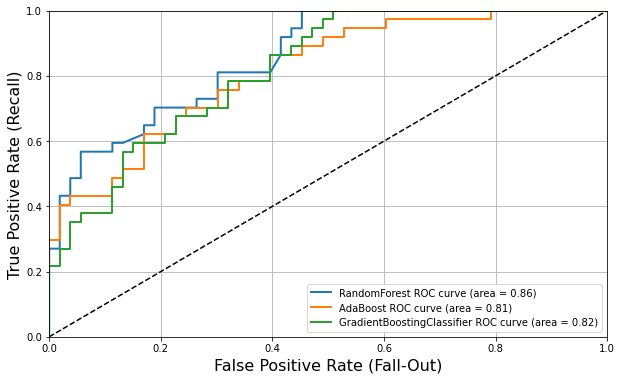

In [52]:
plt.figure(figsize=(10, 6))                                    
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
labels=['RandomForest', 'AdaBoost', 'GradientBoostingClassifier']
for idx,model in enumerate([rfc_model, adaboost_model, gradientboost_model]):
    y_scores = model.predict_proba(X_test_trf)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right");

## Evaluasi Model analysis :

Dari hasil perbandingan model classification tersebut dipilih model **RandomForestClassifier** karena memiliki nilai performa metrics tertinggi yaitu dengan nilai **Accuracy 0.78**, nilai **recall 0.57**, nilai **precision 0.84**, dan nilai **roc_auc_score 0.86**

Dari visualisasi terlihat bahwa **features importance** dalam model adalah 

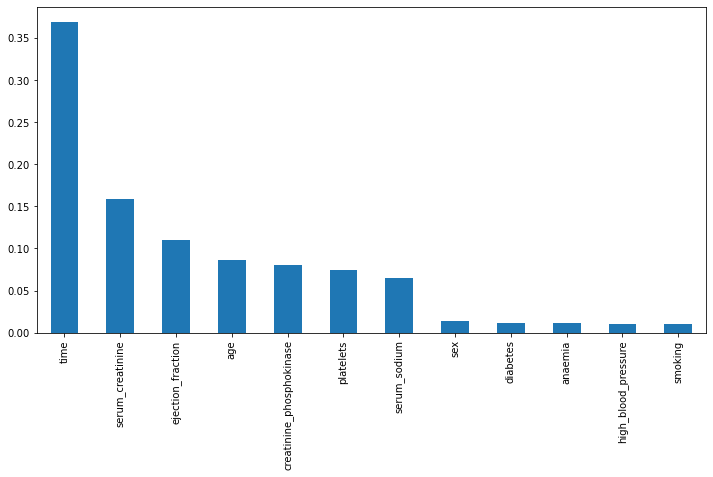

In [53]:
importance = pd.Series(rfc_model.feature_importances_)
importance.index = data.drop('DEATH_EVENT', axis=1).columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6));

# Model Inference

#### Membuat data baru

In [54]:
values = [[25.0,0,400,0,10,1,205000.00,2.9,100,1,0,4]]

In [55]:
data_dummies = pd.DataFrame(values,columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',])

#### Melihat data baru

In [56]:
data_dummies

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,25.0,0,400,0,10,1,205000.0,2.9,100,1,0,4


#### Melakukan prediksi dengan data baru

In [57]:
predictions = rfc_model.predict(data_dummies)
predictions

array([0])

Dari hasil prediksi dengan menggunakan data baru didapatkan nilai 0 ('No') atau ada kemungkinan kematian bukan disebabkan oleh Gagal Jantung.

-------------------------------------------------------------------------------------------------------------------

# Overall Analysis 

#### Tentang Data
Dataset merupakan data untuk dapat memprediksi kelangsungan hidup pasien akibat gagal jantung. 

#### Sumber Data
Data asli berasal dari data kaggle dengan link: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

#### Objective
Membuat model klasifikasi untuk memprediksi kematian akibat Gagal Jantung.

#### Ukuran Data
Data memliki ukuran 299 rows dan 13 columns

#### Exploratory Data Analysis

Dari hasil visualisasi didapatkan informasi sebagai berikut:

* Jumlah pasien yang meninggal akibat gagal jantung adalah 96 pasien dan yang meninggal bukan akibat gagal jantung adalah 203 pasien
* Pasien dengan usia 55 tahun keatas memiliki kemungkinan meninggal akibat gagal jantung, sedangkan untuk pasien dengan usia 40 sampai 55 tahun memiliki kemungkinan kecil meninggal akibat gagal jantung
* Pasien yang menderita anaemie tidak memiliki pengaruh signifikan terhadap kematian akibat gagal jantung
* Pasien dengan tingkat enzim CPK dalam darah sampai dengan 1500 (mcg/L) memiliki kemungkinan resiko meninggal akibat gagal jantung
* Pasien yang menderita Diabetes tidak memiliki pengaruh signifikan terhadap kematian akibat gagal jantung
* Pasien yang memiliki persentase darah yang meninggalkan jantung pada setiap kontraksi dengan range 15% sampai dengan 35% memiliki resiko meninggal akibat gagal jantung
* Pasien menderita hipertensi tidak memiliki pengaruh signifikan terhadap kematian akibat gagal jantung
* Jumlah trombosit dalam darah (kiloplatelet/mL) pasien tidak memiliki pengaruh signifikan terhadap kematian akibat gagal jantung
* Pasien dengan kadar kreatinin serum dalam darah antara 0.75 (mg/dL) sampai dengan 1.0 (mg/dL) memiliki kemungkinan resiko meninggal akibat gagal jantung
* Pasien dengan kadar serum sodium dalam darah antara 120 (mEq/L) sampai dengan 140 (mEq/L) memiliki kemungkinan meninggal akibat gagal jantung
* Jenis kelamin pasien tidak memiliki pengaruh signifikan terhadap kematian akibat gagal jantung
* Pasien dengan kebiasaan merokok dan tidak memiliki kebiasaan merokok tidak memiliki pengaruh signifikan terhadap kematian akibat gagal jantung
* Pasien dengan periode tindak lanjut antara 1 sampai dengan 50 (hari) memiliki kemungkinan meninggal akibat gagal jantung 


#### Model Analysis 

Dalam menentukan model Classication yang ingin dipakai, kita membandingkan model RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier dan melakukan evaluasi performa dari model tersebut 

In [58]:
choose_classification

,model,accuracy,recall,precision,roc_auc_score
0,RandomForestClassifier,0.777778,0.567568,0.840000,0.856196
1,AdaBoost,0.722222,0.513514,0.730769,0.814890
2,GradientBoostingClassifier,0.733333,0.567568,0.724138,0.819480


Dari hasil perbandingan model classification tersebut dipilih model **RandomForestClassifier** karena memiliki nilai metrics tertinggi yaitu dengan nilai **Accuracy 0.78**, nilai **recall 0.57**, nilai **precision 0.84**, dan nilai **roc_auc_score 0.86**

Dari hasil model **RandomForestClassifier** didapatkan **features importance** dalam model adalah feature:

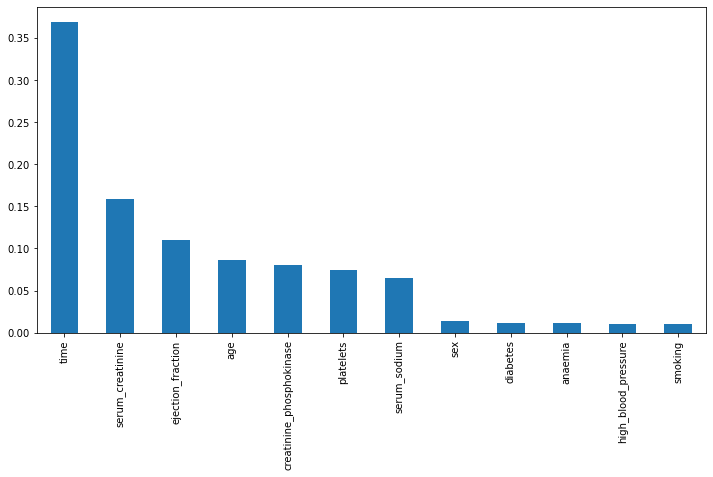

In [59]:
importance = pd.Series(rfc_model.feature_importances_)
importance.index = data.drop('DEATH_EVENT', axis=1).columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6));

#### Model Inference

dengan mencoba data baru sebagai berikut

In [60]:
data_dummies

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,25.0,0,400,0,10,1,205000.0,2.9,100,1,0,4


In [61]:
predictions = rfc_model.predict(data_dummies)
predictions

array([0])

Dari hasil prediksi dengan menggunakan data baru didapatkan nilai 0 ('No') atau ada kemungkinan kematian bukan disebabkan oleh Gagal Jantung.